<a href="https://colab.research.google.com/github/ErickMartinezz/ProcesamientodelHabla/blob/main/webscrapping_ErickMartinez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 PROCESAMIENTO DEL HABLA

ERICK MARTINEZ

Sitio web : https://www.lanacion.com.ar/conversaciones-de-domingo/estanislao-bachrach-fue-mi-cuerpo-el-que-me-dio-la-senal-de-alarma-para-cambiar-de-vida-nid21012024/

Titulo *** Estanislao Bachrach: “Fue mi cuerpo el que me dio la señal de alarma para cambiar de vida” ***




### Entrega de los ejercicios

1. Crea un repositorio GitHub público dedicado a esta materia.
2. Sube tus notebooks de resolución para cada desafío allí.
3. Por cada desafío utilizaremos un sólo notebook.
4. Debes entregar tu TP1 en el foro correspondiente, siguiendo las instrucciones que allí indica.




## EJERCICIO CONSIGNA

* Cree una nube de palabras de un texto en español.

* Dicho texto puede ser descargado de Internet (webscrapping) o extraído del dataset de alguna librería.

* Puede usar cualquier libreria o herramienta para obtener el texto de su interés.

* En este notebook explica el paso a paso del proceso.



## 1- Webscrapping

In [33]:
! pip install requests beautifulsoup4 html5lib


In [34]:
import requests
from bs4 import BeautifulSoup

# URL del artículo
url = "https://www.lanacion.com.ar/conversaciones-de-domingo/estanislao-bachrach-fue-mi-cuerpo-el-que-me-dio-la-senal-de-alarma-para-cambiar-de-vida-nid21012024/"

# Petición al sitio
response = requests.get(url)

# Verificamos si la respuesta fue exitosa
if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')

    # Título del artículo
    titulo = soup.find('h1')
    print("📰 TÍTULO DEL ARTÍCULO:\n", titulo.text.strip() if titulo else "No encontrado")

    # Subtítulo (si existe)
    subtitulo = soup.find('h2')
    if subtitulo:
        print("\n📝 SUBTÍTULO:\n", subtitulo.text.strip())

      # Extraemos todos los párrafos
    parrafos = soup.find_all('p')
    contenido = [p.get_text(strip=True) for p in parrafos]

    # Unimos todo el contenido en un solo string
    texto_completo = " ".join(contenido)

    # Buscamos el inicio y fin del fragmento que nos interesa
    inicio = texto_completo.find("Perderse es fácil")
    fin = texto_completo.find("de cultivar un aprendizaje .") + len("de cultivar un aprendizaje .")

    if inicio != -1 and fin != -1:
        fragmento = texto_completo[inicio:fin]
        print("🧠 FRAGMENTO EXTRAÍDO:\n")
        print(fragmento)
    else:
        print("❌ No se encontraron los límites del fragmento.")

else:
    print(f"❌ Error al acceder a la página: {response.status_code}")


📰 TÍTULO DEL ARTÍCULO:
 Estanislao Bachrach: “Fue mi cuerpo el que me dio la señal de alarma para cambiar de vida”

📝 SUBTÍTULO:
 El biólogo molecular especializado en neurociencias asegura que el autoconocimiento es la herramienta clave; “La empatía se fortalece no tratando de entenderte a vos, sino de entenderme a mí”, dijo
🧠 FRAGMENTO EXTRAÍDO:

Perderse es fácil. Lo fue para el conductor que me llevó hasta la casa, en un barrio cerrado, donde hicimos la entrevista con Estanislao Bachrach. A pesar de las indicaciones en la entrada del lugar y de la propia guía por whastsapp de Bachrach, el conductor se vio desbordado por las vueltas y los caminos que le parecían todos similares. Tanta impotencia le produjo las vueltas sin fin que frente al volante pensó que se trataba de un laberinto del que no iba a poder escapar. Temió por su salida y ante el miedo decidió dejarme a varios metros del punto de encuentro. Bajo la sombra, al resguardo del calor y del castigo del sol, Estanislao esper

## Limpieza de texto

 Pasar el texto a minuscula. Use el siguiente prompt  (me corrigio el codigo).

 prompt: fragmento= fragmento[0]
 fragmento.lower()

In [35]:
fragmento = fragmento.lower()
fragmento


'perderse es fácil. lo fue para el conductor que me llevó hasta la casa, en un barrio cerrado, donde hicimos la entrevista con estanislao bachrach. a pesar de las indicaciones en la entrada del lugar y de la propia guía por whastsapp de bachrach, el conductor se vio desbordado por las vueltas y los caminos que le parecían todos similares. tanta impotencia le produjo las vueltas sin fin que frente al volante pensó que se trataba de un laberinto del que no iba a poder escapar. temió por su salida y ante el miedo decidió dejarme a varios metros del punto de encuentro. bajo la sombra, al resguardo del calor y del castigo del sol, estanislao espera. a lo lejos parece estar meditando. o quizá es solo la idea o la mirada de quien llega urgida. pienso en el hombre que pisó el acelerador para escapar del “laberinto” sin darse la oportunidad de detenerse y mirar. o como dice bachrach enzensorialmente(vr editoras) su último libro:“tus posturas, gestos, movimientos y sensaciones internas influyen,

Eliminar signos de puntuacion

In [36]:
import re
import string

fragmento = re.sub(r'[^\w\s]', '', fragmento)

fragmento


'perderse es fácil lo fue para el conductor que me llevó hasta la casa en un barrio cerrado donde hicimos la entrevista con estanislao bachrach a pesar de las indicaciones en la entrada del lugar y de la propia guía por whastsapp de bachrach el conductor se vio desbordado por las vueltas y los caminos que le parecían todos similares tanta impotencia le produjo las vueltas sin fin que frente al volante pensó que se trataba de un laberinto del que no iba a poder escapar temió por su salida y ante el miedo decidió dejarme a varios metros del punto de encuentro bajo la sombra al resguardo del calor y del castigo del sol estanislao espera a lo lejos parece estar meditando o quizá es solo la idea o la mirada de quien llega urgida pienso en el hombre que pisó el acelerador para escapar del laberinto sin darse la oportunidad de detenerse y mirar o como dice bachrach enzensorialmentevr editoras su último librotus posturas gestos movimientos y sensaciones internas influyen afectan e impactan en 

### 2.1 Muestra las stop words que tenga tu texto.

In [37]:
import nltk
from nltk.corpus import stopwords

In [38]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
# prompt: import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# stopwords_es = set(stopwords.words('spanish'))
# # filtradas = [p for p in palabras if p not in stopwords_es]
# print(filtradas)

from nltk.corpus import stopwords
stopwords_es = set(stopwords.words('spanish'))
stopwords_es

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

### 2.2 Quita las stop-words, caracteres extraños del texto. Utiliza el texto restante para crear una nube de palabras. Usa la biblioteca worldcloud de python.

In [40]:
palabras = fragmento.split()
filtradas = [p for p in palabras if p not in stopwords_es]
filtradas


['perderse',
 'fácil',
 'conductor',
 'llevó',
 'casa',
 'barrio',
 'cerrado',
 'hicimos',
 'entrevista',
 'estanislao',
 'bachrach',
 'pesar',
 'indicaciones',
 'entrada',
 'lugar',
 'propia',
 'guía',
 'whastsapp',
 'bachrach',
 'conductor',
 'vio',
 'desbordado',
 'vueltas',
 'caminos',
 'parecían',
 'similares',
 'tanta',
 'impotencia',
 'produjo',
 'vueltas',
 'fin',
 'frente',
 'volante',
 'pensó',
 'trataba',
 'laberinto',
 'iba',
 'poder',
 'escapar',
 'temió',
 'salida',
 'miedo',
 'decidió',
 'dejarme',
 'varios',
 'metros',
 'punto',
 'encuentro',
 'bajo',
 'sombra',
 'resguardo',
 'calor',
 'castigo',
 'sol',
 'estanislao',
 'espera',
 'lejos',
 'parece',
 'meditando',
 'quizá',
 'solo',
 'idea',
 'mirada',
 'llega',
 'urgida',
 'pienso',
 'hombre',
 'pisó',
 'acelerador',
 'escapar',
 'laberinto',
 'darse',
 'oportunidad',
 'detenerse',
 'mirar',
 'dice',
 'bachrach',
 'enzensorialmentevr',
 'editoras',
 'último',
 'librotus',
 'posturas',
 'gestos',
 'movimientos',
 'sens

In [41]:
!pip install wordcloud

In [42]:
# Importar librerías
from wordcloud import WordCloud
import matplotlib.pyplot as plt

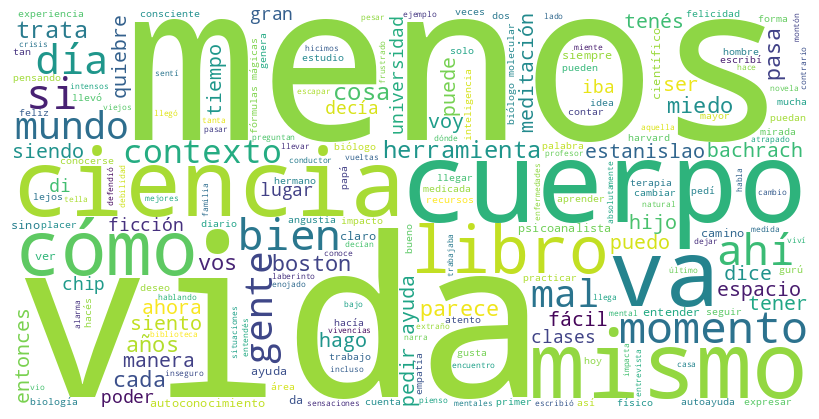

In [43]:
# Convertir la lista de oraciones en una única cadena de texto
texto_wordcloud = " ".join(filtradas)

# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(texto_wordcloud)

# mostramos la imagen generada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### 2.3 Usando el texto que conseguiste en el punto 1).



#### 2.3.1 Limpia y preprocesa el texto, descomponelo en oraciones, arma una matriz documento-vocabulario.



#### 2.3.2 Determina la longitud de tu vocabulario.


#### 2.3.3. Aplica TF-IDF a tu matriz documento-vocabulario

# Conclusiones

Agregue aquí sus conclusiones sobre este trabajo práctico. Puede ser también parte del texto que posteará en el foro.